# Analysing Historical Cultures 2


Have you heard about the Google Ngram Viewer, which plots frequencies of words using a yearly count in sources printed between 1500 and 2008 in Google’s book corpora? It has created quite an excitement in the digital methods world. Check out http://firstmonday.org/ojs/index.php/fm/article/view/5567/5535. There are many examples and some strong believers. You can try Google’s Ngram Viewer under https://books.google.com/ngrams.

We can use it to compare, for example the difference in frequencies over the years between the words hacker and programmer between 1950 and 2000. Let's see, we start with hacker.

In [1]:
import requests
import json
import pandas as pd
import numpy as np

hacker = requests.get(url = 'https://books.google.com/ngrams/json?content=hacker&year_start=1950&year_end=2000&corpus=26&smoothing=3')
json_data = json.loads(hacker.text)
data = json_data[0]


Let's first create a dataframe that collects the frequencies for each year.

In [2]:
df = pd.DataFrame.from_dict(data['timeseries'])
df = df.rename(columns={0: 'hacker'})

In [3]:
years = np.arange(1950,2001,1)
df['year'] = years

And plot it.

<AxesSubplot:xlabel='year'>

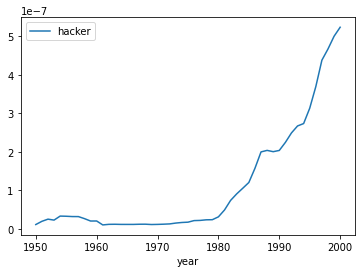

In [4]:
df.plot(x='year', y ='hacker')

Not let's add the frequencies of programmer to this dataframe too.

In [5]:
progr = requests.get(url = 'https://books.google.com/ngrams/json?content=programmer&year_start=1950&year_end=2000&corpus=26&smoothing=3')
json_data = json.loads(progr.text)
data = json_data[0]
df['programmer'] = pd.DataFrame.from_dict(data['timeseries'])


And plot them together

<AxesSubplot:xlabel='year'>

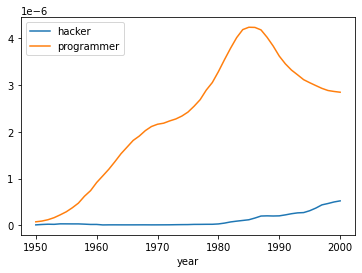

In [6]:
df.plot(x='year')

Let us compare the popularity of monarchies and democracies too from 1500 to 2000

In [7]:
demo = requests.get(url = 'https://books.google.com/ngrams/json?content=democracy&year_start=1500&year_end=2000&corpus=26&smoothing=3')
json_data = json.loads(demo.text)
data = json_data[0]
df2 = pd.DataFrame.from_dict(data['timeseries'])
df2 = df2.rename(columns={0: 'democracy'})

In [8]:
mona = requests.get(url = 'https://books.google.com/ngrams/json?content=monarchy&year_start=1500&year_end=2000&corpus=26&smoothing=3')
json_data = json.loads(mona.text)
data = json_data[0]
df2['monarchy'] = pd.DataFrame.from_dict(data['timeseries'])

In [9]:
years = np.arange(1500,2001,1)
df2['year'] = years
df2

,democracy,monarchy,year
0,2.339067e-07,0.000000,1500
1,1.871254e-07,0.000000,1501
2,1.559378e-07,0.000000,1502
3,1.336610e-07,0.000000,1503
4,0.000000e+00,0.000000,1504
...,...,...,...
496,2.868582e-05,0.000004,1996
497,2.912133e-05,0.000004,1997
498,2.933466e-05,0.000004,1998
499,2.950909e-05,0.000004,1999


<AxesSubplot:xlabel='year'>

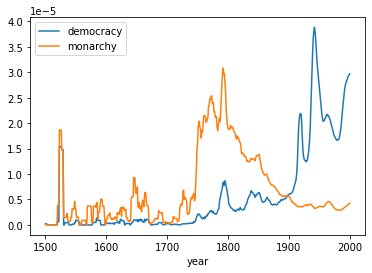

In [10]:
df2.plot(x='year')

There is a lot going on here but democracy seems to be winning. Let’s move on to another example. If you have done a little bit of research on the Holocaust, you might know that there are on-going debates on whether to call it Shoah or Holocaust (https://en.wikipedia.org/wiki/Names_of_the_Holocaust). Rewrite the last expression so with shoah instead of democracy and holocaust instead of monarchy.

In [11]:
shoah = requests.get(url = 'https://books.google.com/ngrams/json?content=shoah&year_start=1500&year_end=2000&corpus=26&smoothing=3')
json_data = json.loads(shoah.text)
data = json_data[0]
df3 = pd.DataFrame.from_dict(data['timeseries'])
df3 = df3.rename(columns={0: 'shoah'})

holo = requests.get(url = 'https://books.google.com/ngrams/json?content=holocaust&year_start=1500&year_end=2000&corpus=26&smoothing=3')
json_data = json.loads(holo.text)
data = json_data[0]
df3['holocaust'] = pd.DataFrame.from_dict(data['timeseries'])

years = np.arange(1500,2001,1)
df3['year'] = years

<AxesSubplot:xlabel='year'>

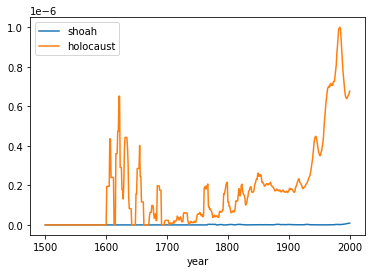

In [12]:
df3.plot(x='year')

So, despite the efforts to popularise the Hebrew word Shoah, Holocaust is still far more commonly used. Frequency has proven to be a good indicator of the development and importance of ideas. But it is not the only text analysis tool that we can use to derive ideas from documents. 

Another commonly used text mining tool is information extraction (https://en.wikipedia.org/wiki/Information_extraction). With information extraction we can retrieve ideas and concepts directly from texts.

We would like to concentrate on the online information extraction service https://spacy.io. It can be easily implemented in oython as can be seen on the homepage by downloading and importing spacy. We are going to use it on an english text, namely one of the speeches that we have seen in the previous assignment, for this we will need an englisht tokenizer, in your terminal run: python -m spacy download en_core_web_sm


In [13]:
import spacy

In [14]:
nlp = spacy.load("en_core_web_sm")

In [15]:
text = open('data/20070123.txt', 'r')
text = text.read()
doc = nlp(text)

With the function below you should see the kind of entities that are contained in your submission document. Try it.

In [16]:
for entity in doc.ents:
    print(entity.text, entity.label_)

George W. Bush PERSON
January 23, 2007
 DATE
Tonight TIME
first ORDINAL
the State of the Union GPE
his day DATE
Thomas D'Alesandro PERSON
Baltimore GPE
Maryland GPE
Presidents Roosevelt PERSON
Truman PERSON
Nancy PERSON
tonight TIME
the House of Representatives ORG
Two CARDINAL
House ORG
Senate ORG
tonight TIME
Tim Johnson PERSON
Charlie Norwood PERSON
Cheney PERSON
Congress ORG
a defining hour TIME
the year 2007 DATE
Chamber ORG
House ORG
Senate ORG
Democratic NORP
Congress ORG
Nation ORG
America GPE
first ORDINAL
American NORP
Americans NORP
tonight TIME
the 41st month DATE
7.2 million CARDINAL
Next week DATE
Tonight TIME
three CARDINAL
Congress ORG
First ORDINAL
Washington GPE
half CARDINAL
2009 DATE
3 years ahead DATE
the coming weeks DATE
the next 5 years DATE
the Federal Government ORG
the last hour TIME
C-SPAN ORG
2005 DATE
over 13,000 CARDINAL
nearly $18 billion MONEY
over 90 percent PERCENT
House ORG
Senate ORG
Congress ORG
half CARDINAL
Social Security ORG
Medicare ORG
Medica

Extracting entities can be a useful in the automatic analysis of texts. We can use the entities to understand content better or even provide effective links between different texts. If we know that two documents are about the same place, for instance, it seems logical that there is a link between them based on the place. Because I have worked a lot with computational archives, where we want to link collections and documents, I have done a lot of work in information extraction – especially with heterogeneous historical material. I have also been involved with analysing testimonies and other oral histories. Here, a typical question is the kind of sentiment a memory expresses. Is it a positive or negative memory? If so to what degree? These are the kinds of questions that automated sentiment analysis can answer, which we cover next.

Sentiment analysis aims to evaluate emotions and other highly subjective expressions in a text. Commonly this is applied to finding out whether tweets, movie reviews, etc. express a positive or negative sentiment. In fact, later in the module, when we discuss prediction models, we will look into an example based on movie reviews. Generally speaking, sentiment analysis is done using a so-called supervised approach, where a human annotates a collection with the sentiments of a document and the computer tries to learn about the decisions on sentiments of that human.

<!-- We will use an unsupervised approach, where the computer learns by itself. We have already seen an example of unsupervised learning when we clustered US Congress voting behaviour. Some people argue that sentiment analysis should never be done as unsupervised learning. Gary King, for instance, consistently warns us that this is one of the worst possible mistakes. Check out his website http://gking.harvard.edu/. He should be interesting for us. -->

We use the dictionary-based sentiment analysis approach developed in https://www.r-bloggers.com/sentiment-analysis-on-donald-trump-using-r-and-tableau/.  It uses a lexicon of positive and negative words and then simply counts the number of times positive and negative words appear in a text. If there are more positive words than negative words, the text will get an overall positive sentiment, otherwise a negative one.

In [17]:
import nltk

First we clean the speechtexts

In [18]:
import pyreadr
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stopwords_ = list(stopwords.words('english'))

df = pd.read_csv('data/sotu_all.csv')

def clean_text(df):
    docs = []
    for index in df.index:
        speech = df.loc[index, 'speechtext']
        text = ''.join(speech)
        words = word_tokenize(text)
        words = [word.replace(" ", "") for word in words]
        words = [word.lower() for word in words if word.isalpha()]
        words = [word for word in words if word not in stopwords_]
#         words back to string
        wordstr = ' '.join(word for word in words)
        df.loc[index, 'speechtext'] = wordstr
        docs.append(words)
    return docs, df

docs, df = clean_text(df)


And prepare the lexicon of positive and negative words

In [19]:
neg_words = open("data/negative-words.txt", encoding = "ISO-8859-1")
neg_words = neg_words.read().split('\n')
print(neg_words[:10])

pos_words = open("data/positive-words.txt", encoding = "ISO-8859-1")
pos_words = pos_words.read().split('\n')
print(pos_words[:10])

['2-faced', '2-faces', 'abnormal', 'abolish', 'abominable', 'abominably', 'abominate', 'abomination', 'abort', 'aborted']
['a+', 'abound', 'abounds', 'abundance', 'abundant', 'accessable', 'accessible', 'acclaim', 'acclaimed', 'acclamation']


Now we check for each word in our text whether it is in either the list of positive or that of negative words, this might take a while.

In [20]:
# from nltk.sentiment import SentimentIntensityAnalyzer
# sia = SentimentIntensityAnalyzer()

for index, row in df.iterrows():
    text = row['speechtext']
    words = word_tokenize(text)
    negs =0
    pos =0
    for word in words:
        if word in neg_words:
            negs+=1
        if word in pos_words:  
            pos+=1
        df.loc[index, 'pos'] = pos
        df.loc[index, 'neg'] = negs
        


Let's now add these numbers to our dataframe

In [82]:
df


,rownames,speechtext,year,date,pos,neg
0,17900108.html,senate house representatives embrace great sat...,1790,17900108,86.0,15.0
1,17901208.html,senate house representatives meeting feel much...,1790,17901208,72.0,24.0
2,17911025.html,senate house representatives vain may expect p...,1791,17911025,119.0,52.0
3,17921106.html,senate house representatives abatement satisfa...,1792,17921106,83.0,57.0
4,17931203.html,senate house representatives since commencemen...,1793,17931203,84.0,58.0
...,...,...,...,...,...,...
226,20130212.html,speaker vice president members congress fellow...,2013,20130212,301.0,117.0
227,20140128.html,speaker vice president members congress fellow...,2014,20140128,294.0,133.0
228,20150120.html,speaker vice president members congress fellow...,2015,20150120,293.0,162.0
229,20160112.html,speaker vice president members congress fellow...,2016,20160112,250.0,136.0


In [83]:
for index, row in df.iterrows():
#     df.loc[index, 'sent_score'] = row['pos'] - row['neg']
    tot= row['pos'] + row['neg']
    df.loc[index, 'pos_score'] = row['pos']/tot
#     df.loc[index, 'neg_score'] = -row['neg']/tot



We can now check whether there are more positive or negative words in each text by using the pos_score, which means it is positive if >0.5, meaning that more than 50 percent of the words are positive

In [84]:
df
# Thus more positive??

,rownames,speechtext,year,date,pos,neg,pos_score
0,17900108.html,senate house representatives embrace great sat...,1790,17900108,86.0,15.0,0.851485
1,17901208.html,senate house representatives meeting feel much...,1790,17901208,72.0,24.0,0.750000
2,17911025.html,senate house representatives vain may expect p...,1791,17911025,119.0,52.0,0.695906
3,17921106.html,senate house representatives abatement satisfa...,1792,17921106,83.0,57.0,0.592857
4,17931203.html,senate house representatives since commencemen...,1793,17931203,84.0,58.0,0.591549
...,...,...,...,...,...,...,...
226,20130212.html,speaker vice president members congress fellow...,2013,20130212,301.0,117.0,0.720096
227,20140128.html,speaker vice president members congress fellow...,2014,20140128,294.0,133.0,0.688525
228,20150120.html,speaker vice president members congress fellow...,2015,20150120,293.0,162.0,0.643956
229,20160112.html,speaker vice president members congress fellow...,2016,20160112,250.0,136.0,0.647668


Let’s plot a histogram of the scores’ distribution with df.hist(column='pos_score'). The sentiments are fairly postive,
(what does this mean?)

 Why do you think a list of dictionary words might be dependent on language usage? Does the list of positive and negative words therefore change over time? What does this mean for our historical comparison?

array([[<AxesSubplot:title={'center':'pos_score'}>]], dtype=object)

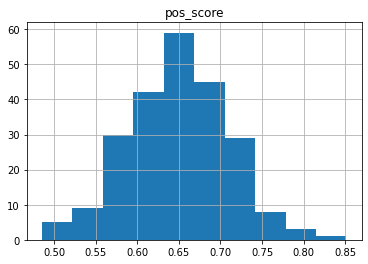

In [85]:
df.hist(column='pos_score')

Finally, let’s quickly plot the sentiments over time with df.plot(x='year',y='pos_score', kind='scatter')

We again see that negative sentiments dominate the speeches.

<AxesSubplot:xlabel='year', ylabel='pos_score'>

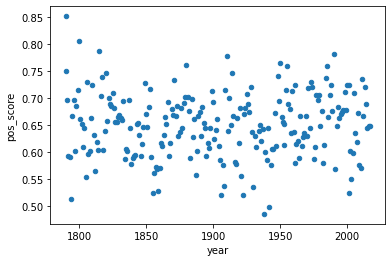

In [86]:
df.plot(x='year',y='pos_score', kind='scatter')